In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

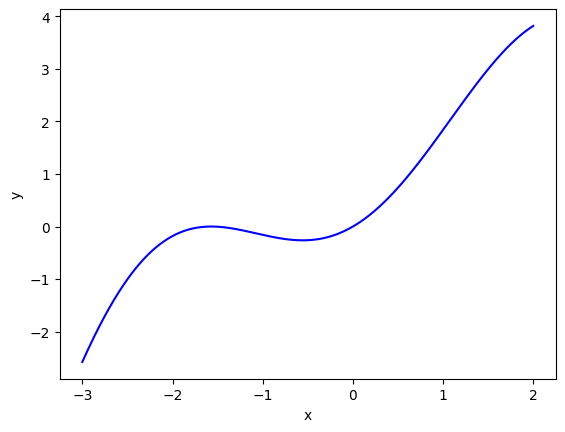

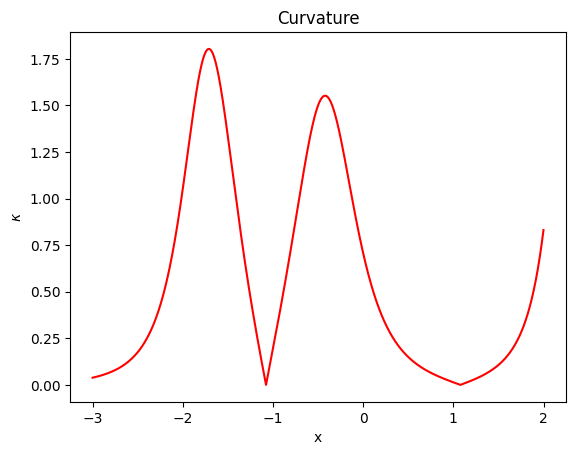

In [12]:
def func(x):
    y = x + x*math.sin(x)
    return y
    
x_list = []
y_list = []
for x in np.arange(-3,2,0.001):
    y = func(x)
    
    x_list.append(x)
    y_list.append(y)

plt.plot(x_list, y_list, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



def first_derivative(func, x, h=1e-5):
    return (func(x + h) - func(x)) / h

def second_derivative(func, x, h=1e-5):
    return (func(x + h) - 2 * func(x) + func(x - h)) / (h**2)

def curvature(func, x):
    first_deriv = first_derivative(func, x)
    second_deriv = second_derivative(func, x)

    numerator = abs(second_deriv)
    denominator = (1 + first_deriv**2)**(3/2)

    return numerator / denominator

x_list = np.arange(-3, 2, 0.001)
y_list = [func(x) for x in x_list]

curvature_list = [curvature(func, x) for x in x_list]


plt.title('Curvature')
plt.plot(x_list, curvature_list, 'r-')
plt.xlabel('x')
plt.ylabel(r'$\kappa$')
plt.show()

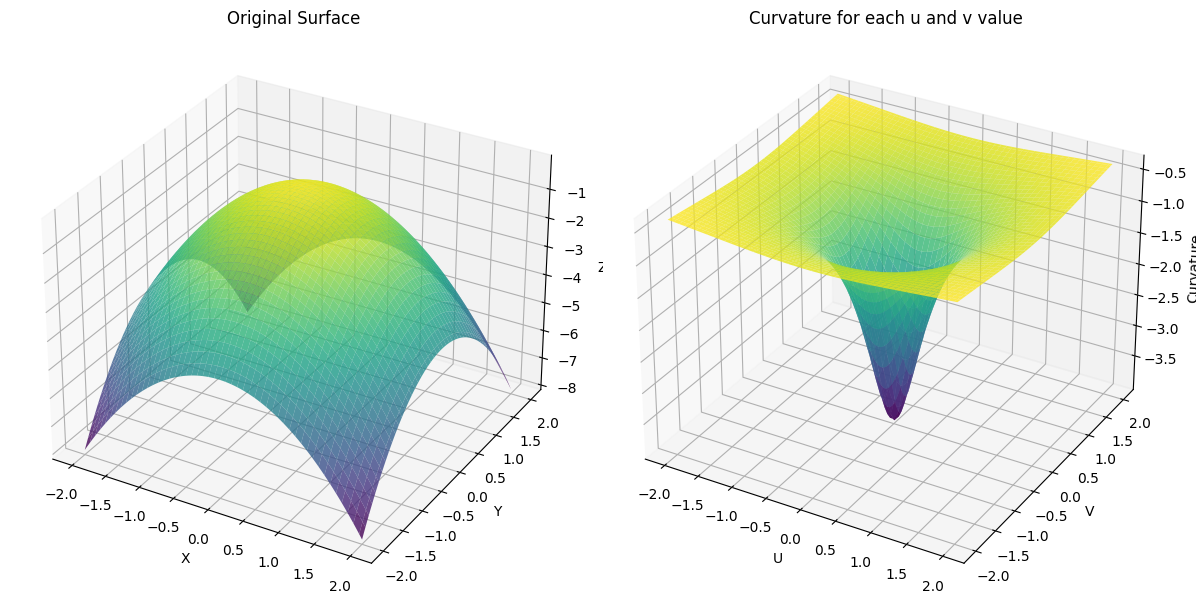

In [35]:
def surface(u, v):
    x = u
    y = v
    z = u**2 + v**2
    return x, y, z

# def surface(u, v):
#     x = u
#     y = v
#     z = np.sin(u) * np.cos(v) * 3 + np.sin(u + v) * 2 + np.cos(u) * np.sin(2*v) * 2
#     return x, y, z

def first_partial_derivative(func, u, v, h=1e-5, partial='u'):
    if partial == 'u':
        return (func(u + h, v)[2] - func(u, v)[2]) / h
    elif partial == 'v':
        return (func(u, v + h)[2] - func(u, v)[2]) / h
    
def second_partial_derivative(func, u, v, h=1e-5, partial='u'):
    if partial == 'u':
        return (func(u + h, v)[2] - 2 * func(u, v)[2] + func(u - h, v)[2]) / h**2
    elif partial == 'v':
        return (func(u, v + h)[2] - 2 * func(u, v)[2] + func(u, v - h)[2]) / h**2
    elif partial == 'uv':
        return (func(u + h, v + h)[2] - func(u - h, v + h)[2] - func(u + h, v - h)[2] + func(u - h, v - h)[2]) / (4 * h**2)
    
    
def curvature_3d(func, u, v):
    x_prime = first_partial_derivative(func, u, v, partial='u')
    y_prime = first_partial_derivative(func, u, v, partial='v')
    x_double_prime = second_partial_derivative(func, u, v, partial='u')
    y_double_prime = second_partial_derivative(func, u, v, partial='v')
    x_prime_y_prime = second_partial_derivative(func, u, v, partial='uv')
    
    curvature = ((1 + (x_prime**2))*y_double_prime - 2*x_prime*y_prime*x_prime_y_prime + (1 + (y_prime**2))*x_double_prime)/((1 + (x_prime**2) + (y_prime**2))**(3/2))

    return curvature


# Generate u and v values
u_values = np.linspace(-2, 2, 100)
v_values = np.linspace(-2, 2, 100)

# u_values = np.linspace(-2*np.pi, 2*np.pi, 100)
# v_values = np.linspace(-2*np.pi, 2*np.pi, 100)

# Create a meshgrid of u and v values
u_mesh, v_mesh = np.meshgrid(u_values, v_values)

# Evaluate the surface function for each point in the meshgrid
x_mesh, y_mesh, z_mesh = surface(u_mesh, v_mesh)

# Calculate curvature for each point in the meshgrid
curvature_mesh = np.zeros_like(u_mesh)
for i in range(len(u_values)):
    for j in range(len(v_values)):
        curvature_mesh[i, j] = curvature_3d(surface, u_mesh[i, j], v_mesh[i, j])

# Plot the surface
fig = plt.figure(figsize=(12, 6))

# Plotting the original surface
ax_original = fig.add_subplot(121, projection='3d')
ax_original.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', alpha=0.8)
ax_original.set_xlabel('X')
ax_original.set_ylabel('Y')
ax_original.set_zlabel('Z')
ax_original.set_title('Original Surface')

# Plotting the surface
ax_surface = fig.add_subplot(122, projection='3d')
ax_surface.plot_surface(u_mesh, v_mesh, curvature_mesh, cmap='viridis', alpha=0.8)
ax_surface.set_xlabel('U')
ax_surface.set_ylabel('V')
ax_surface.set_zlabel('Curvature')
ax_surface.set_title('Curvature for each u and v value')


plt.tight_layout()
plt.show()

# Experiment with growth functions and curvature

In [106]:
growth_function_dict = {}

### Example 1: exponential decay

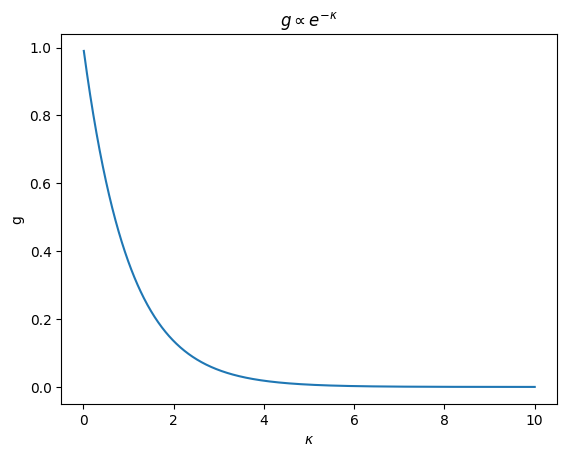

In [107]:
def growth(w, co2, h, curvature):
    return(w * co2 - (1 - w)*h)*math.exp(-curvature)



w = 1
co2 = 1
h = 0.3

growth_list = []
curvature_list = []
for curv in np.linspace(0.01,10,num=1000):
    growth_list.append(growth(w, co2, h, curv))
    curvature_list.append(curv)

plt.title(r'$g \propto e^{-\kappa}$')
plt.plot(curvature_list, growth_list)
plt.xlabel(r'$\kappa$')
plt.ylabel('g')
plt.show()

growth_function_dict['exponential'] = growth_list

### Example 2: sigmoidal decay

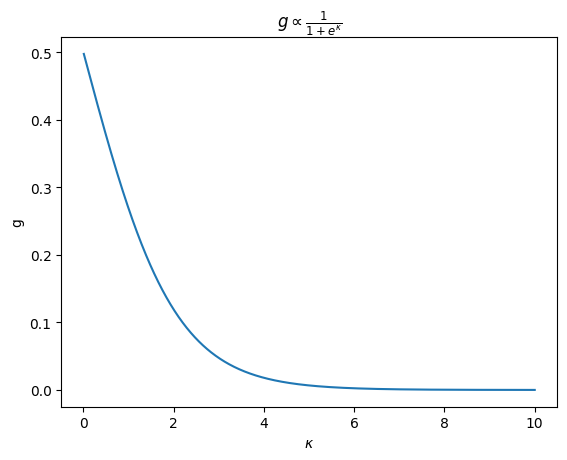

In [108]:
def growth(w, co2, h, curvature):
    return (w * co2 - (1 - w)*h)*(1/(1+math.exp(curvature)))
# curvature - max(curvature) to get the sigmoidal curve

growth_list = []
curvature_list = []
for curv in np.linspace(0.01,10,num=1000):
    growth_list.append(growth(w, co2, h, curv))
    curvature_list.append(curv)
    
plt.title(r'$g \propto \frac{1}{1 + e^{\kappa}}$')
plt.plot(curvature_list, growth_list)
plt.xlabel(r'$\kappa$')
plt.ylabel('g')
plt.show()

growth_function_dict['sigmoidal'] = growth_list

### Example 3: reciprocal

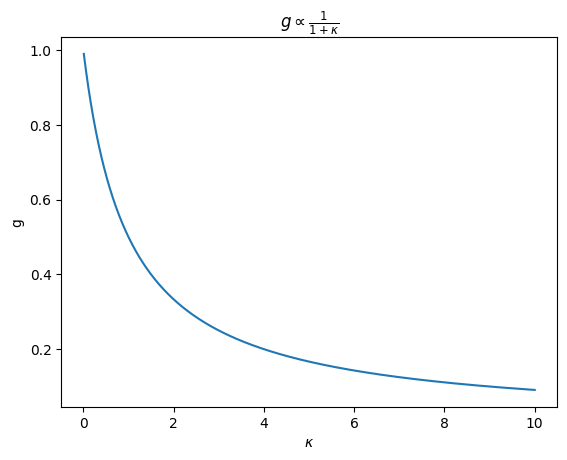

In [109]:
def growth(w, co2, h, curvature):
    return(w * co2 - (1 - w)*h)*(1/(1+curvature))

growth_list = []
curvature_list = []
for curv in np.linspace(0.01,10,num=1000):
    growth_list.append(growth(w, co2, h, curv))
    curvature_list.append(curv)
    
plt.title(r'$g \propto \frac{1}{1 + \kappa}$')
plt.plot(curvature_list, growth_list)
plt.xlabel(r'$\kappa$')
plt.ylabel('g')
plt.show()

growth_function_dict['reciprocal'] = growth_list

### Example 4: power function

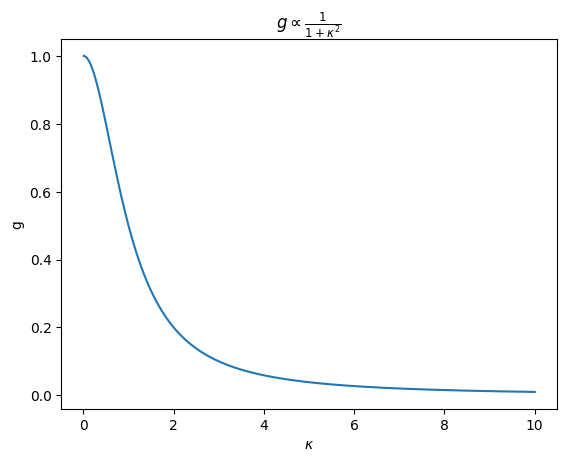

In [110]:
def growth(w, co2, h, curvature):
    return(w * co2 - (1 - w)*h)*(1/(1+curvature**2))


growth_list = []
curvature_list = []
for curv in np.linspace(0.01,10,num=1000):
    growth_list.append(growth(w, co2, h, curv))
    curvature_list.append(curv)
    
plt.title(r'$g \propto \frac{1}{1 + \kappa^{2}}$')
plt.plot(curvature_list, growth_list)
plt.xlabel(r'$\kappa$')
plt.ylabel('g')
plt.show()

growth_function_dict['power'] = growth_list

### All of the above

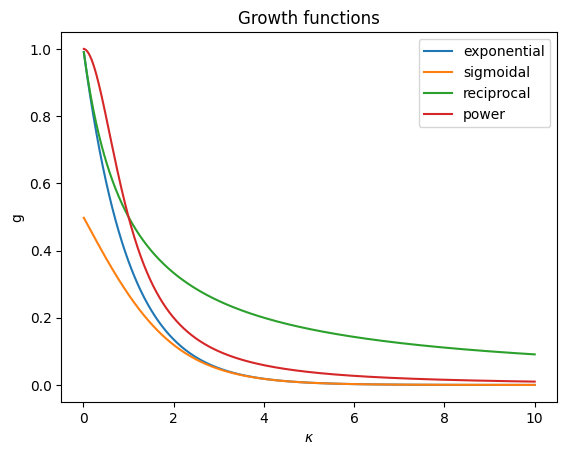

In [111]:
for key in growth_function_dict:
    growth_list = growth_function_dict[key]
    plt.plot(curvature_list, growth_list, label=key)

plt.title('Growth functions')
plt.xlabel(r'$\kappa$')
plt.ylabel('g')
plt.legend()
plt.show()
    